In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

adc.json  drive  sample_data


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/reklam.csv')
#df = df.iloc[:,1:len(df)]
df.head()

# Basit Doğrusal Regresyon

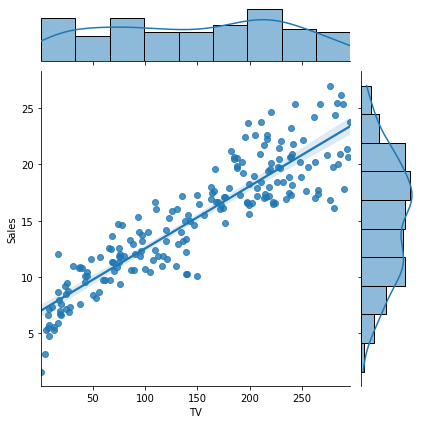

In [ ]:
import seaborn as sns
sns.jointplot(x ="TV", y = "Sales", data=df, kind="reg");

In [ ]:
# tahmin edici yapalım
from sklearn.linear_model import LinearRegression
X = df[["TV"]]

In [ ]:
y= df[["Sales"]]

In [ ]:
reg = LinearRegression()

In [ ]:
model = reg.fit(X, y) #fit kur demek

In [ ]:
dir(model) # içeriğe bakmak için

In [ ]:
model.intercept_ # beta0 katsayısı

array([6.97482149])

In [ ]:
model.coef_ # beta1 katsayısı

array([[0.05546477]])

In [ ]:
# R kare ifadesi
model.score(X,y) # bağımsız değişkenlerin, bağımlı değişkeni açıklama yüzdesi

0.8121757029987413

## Tahmin 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


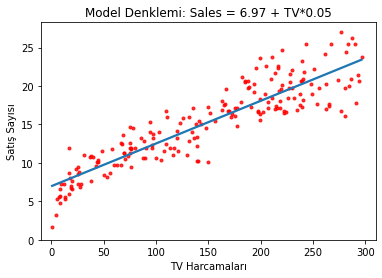

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["Sales"], ci=None, scatter_kws={'color':'r', 's':9})
# regplot= regresyon görseleştirmesi, 
# ci=None bu etrflarına güven aralığı koyma demek,
g.set_title("Model Denklemi: Sales = 6.97 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [ ]:
model.predict([[165]]) # Tahmin et demek

array([[16.12650862]])

In [ ]:
yeni_veri = [[5], [15], [30]]
model.predict(yeni_veri)

array([[7.25214534],
       [7.80679305],
       [8.6387646 ]])

## MSE = Hata Kareler Ortalaması

In [ ]:
gercek_y = y[0:10]
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis =1)
hatalar.columns= ["gercek_y","tahmin_edilen_y"]
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,19.737265
1,10.4,9.443004
2,12.0,7.928816
3,16.5,15.377734
4,17.9,17.002852
5,7.2,7.457365
6,11.8,10.164046
7,13.2,13.641687
8,4.8,7.451819
9,15.6,18.056683


In [ ]:
# Hata kareler ortalaması
import numpy as np
hatalar["hata"]= hatalar["gercek_y"]-hatalar["tahmin_edilen_y"]
hatalar["hata_kareler"]= hatalar["hata"]**2
np.mean(hatalar["hata_kareler"])

4.1142356788866845

# Çoklu Doğrusal Regresyon

In [ ]:
X = df.drop('Sales', axis=1)
y = df[["Sales"]]
y.head()


,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [ ]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


## Statsmodels ile model Kurmak

In [ ]:
import statsmodels.api as sm
lm = sm.OLS(y, X)
model = lm.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Scikit Learn ile Model Kurmak

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X,y)
model.intercept_ # sabitimiz


array([4.62512408])

In [ ]:
model.coef_ # Katsayılarımız

array([[0.05444578, 0.10700123, 0.00033566]])

## Tahmin

In [ ]:
# Sales = 4.62 + TV*0.05 + radio*0.10 - newspaper*0.0003
yeni_veri= [[30], [10], [40]]
import pandas as pd
yeni_veri=pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,30,10,40


In [ ]:
model.predict(yeni_veri)

array([[7.34193609]])

In [ ]:
# Hata Kareler Ortalaması
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y, model.predict(X)) # y gerçek değerler, predict tahmin değerleri
MSE

2.706006147627315

In [ ]:
import numpy as np
RMSE = np.sqrt(MSE) # Hata Kareler Ortalamasının Kare Kökü
MSE

2.706006147627315

## Model Turing (Model Doğrulama)

In [ ]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [ ]:
# Sınama Seti
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=99) #random state her seferinde farklılık olmaması için

In [ ]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(X_train))) #Eğitim hatası

1.6718747906345512

In [ ]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test))) # Test Hatası

1.5470569555198488

In [ ]:
# K-Katlı CV
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv= 10, scoring="neg_mean_squared_error")

array([-3.91027681, -1.53732623, -2.60436152, -3.17594489, -2.90813456,
       -2.57342302, -1.57650449, -3.02020352, -1.24322067, -7.04159578])

In [ ]:
# CV MSE
#negatiflikten kurtulmak ve ortalama almak için
np.mean(-cross_val_score(model, X_train, y_train, cv= 10, scoring="neg_mean_squared_error"))

2.959099149257331

In [ ]:
# CV RMSE
#negatiflikten kurtulmak ve ortalama almak için
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv= 10, scoring="neg_mean_squared_error")))

1.720203229056768

# Ridge Regresyon 

## Kütüphaneler

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import  RidgeCV
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/Hitters.csv')
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
ridge_model = Ridge(alpha= 0.1).fit(X_train, y_train)
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [ ]:
ridge_model.intercept_

-4.57862690572324

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

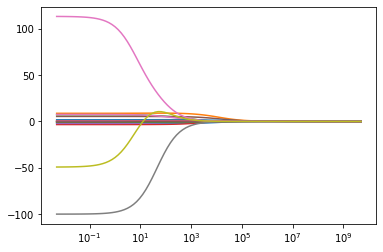

In [ ]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

## Tahmin

In [ ]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_train) # y_pred bu y predict in kısalması yani y tahmin et demek
y_pred[0:10] # tahmin verileri

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [ ]:
y_train # gerçek veriler

183     125.000
229    1940.000
286     940.000
102     375.000
153     100.000
         ...   
24      776.667
236     750.000
93      145.000
137     430.000
133      87.500
Name: Salary, Length: 197, dtype: float64

In [ ]:
# Train Hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

289.34470696006565

In [ ]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv= 10, scoring="neg_mean_squared_error")))

351.39315856063195

In [ ]:
# Test Hatası
y_pred = ridge_model.predict(X_test) # X test setinin bağımlı değişkenlerini kullanarak y bağımlı testleri tahmin ettik
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

356.8082905730239

## Model Tuning

In [ ]:
ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test) 
np.sqrt(mean_squared_error(y_test, y_pred))

356.8082905730239

In [ ]:
np.random.randint(0,1000,100)

array([956, 923, 762, 738, 582, 998, 874, 933, 961, 140, 226, 251, 191,
       488, 378, 829, 658, 870, 681,   6, 772, 593, 459, 419, 597, 844,
       127, 468, 942, 575, 417, 874, 832, 605, 177, 923, 261, 301, 329,
       360, 995, 549, 442, 115, 752, 821, 891, 566, 598, 785, 491, 390,
        15, 221, 668, 971, 413, 570, 229, 688, 796, 205, 749, 933, 837,
       576, 344, 156, 571, 904, 240, 970, 525, 390,  29, 640, 100, 326,
       409, 687, 784,  46, 409, 533,  64, 580,  73, 144, 989, 898, 792,
       753, 378, 196, 943, 881, 410, 208, 204,  82])

In [ ]:
lambdalar1 = np.random.randint(0,1000,100)
lambdalar2 = 10**np.linspace(0,-2,100)*0.5
ridgecv = RidgeCV(alphas=lambdalar2, scoring="neg_mean_squared_error", cv=10, normalize=True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([0.5       , 0.47727423, 0.45558138, 0.4348745 , 0.41510878,
       0.39624145, 0.37823166, 0.36104045, 0.34463061, 0.32896661,
       0.31401457, 0.29974213, 0.28611838, 0.27311386, 0.26070041,
       0.24885118, 0.23754051, 0.22674393, 0.21643806, 0.20660062,
       0.1972103 , 0.18824679, 0.17969068, 0.17152346, 0.16372746,
       0.15628579, 0.14918236, 0.14240179, 0.13592941, 0.12975121,
       0.12385...
       0.01526928, 0.01457527, 0.0139128 , 0.01328044, 0.01267682,
       0.01210064, 0.01155065, 0.01102565, 0.01052452, 0.01004617,
       0.00958955, 0.00915369, 0.00873764, 0.0083405 , 0.00796141,
       0.00759956, 0.00725414, 0.00692443, 0.00660971, 0.00630928,
       0.00602252, 0.00574878, 0.00548749, 0.00523808, 0.005     ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [ ]:
ridgecv.alpha_

0.5

In [ ]:
# Final modeli
ridge_tuned = Ridge(alpha= ridgecv.alpha_).fit(X_train, y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.91819832682194

# Lasso Regresyon Modeli

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import  RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

## Veri seti

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/Hitters.csv')
df = df.dropna() # Eksik Gözlemleri çıkarma
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
df.shape

(263, 20)

In [ ]:
lasso_model = Lasso(alpha= 0.1).fit(X_train, y_train)
lasso_model.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388069, tolerance: 3898.6869563806586
  positive)


array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

In [ ]:
lasso_model.intercept_

-7.769490374097927

In [ ]:
# Farklı lambda değerlerine karşılık katsayıları
lasso = Lasso()
coefs = []
alphas = np.random.randint(0,1000,10)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

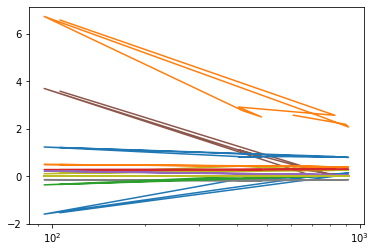

In [ ]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

## Tahmin

In [ ]:
lasso_model

In [ ]:
lasso_model.predict(X_train)[0:5]


In [ ]:
lasso_model.predict(X_test)[0:5]


In [ ]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148768

In [ ]:
# Bağımsız değişkenlerce, bağımlı değişkende ki değişikliğin açıklanma yüzdesidir.
r2_score(y_test, y_pred)

0.4120646912685776

## Model Tuning

In [ ]:
lasso_cv_model = LassoCV( cv = 10, max_iter=100000).fit(X_train, y_train)
lasso_cv_model.alpha_

563.4670501833854

In [ ]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train) # üsteki ile aynı

In [ ]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

373.59572250697937

In [ ]:
pd.Series(lasso_tuned.coef_, index= X_train.columns)

# ElasticNet Regresyon Modeli

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import  RidgeCV, LassoCV

## Veri Seti

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/Hitters.csv')
df = df.dropna() # Eksik Gözlemleri çıkarma
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
enet_model = ElasticNet().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367338, tolerance: 3898.6869563806586
  positive)


In [ ]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [ ]:
enet_model.intercept_

-6.465955602112217

In [ ]:
#Tahmin
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [ ]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [ ]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181244

In [ ]:
r2_score(y_test, y_pred)

0.41070222469326934

## Model Tuning

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [ ]:
enet_cv_model = ElasticNetCV(alphas = alphas, cv = 10).fit(X_train, y_train)
enet_cv_model.alpha_

In [ ]:
enet_cv_model.intercept_

In [ ]:
enet_cv_model.coef_

In [ ]:
#Final modeli
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)

In [ ]:
y_pred = enet_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

393.97530658505536

In [ ]:
import statsmodels.api as sm
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

In [ ]:
reg = LinearRegression()
model = reg.fit(X, y)
print(dir(model))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_preprocess_data', '_residues', '_set_intercept', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_jobs', 'normalize', 'predict', 'rank_', 'score', 'set_params', 'singular_']
